<a href="https://colab.research.google.com/github/vishalpuri07/VISHAL_INFO5731_FALL2021/blob/main/In_class_exercise_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fifth in-class-exercise (40 points in total, 11/11/2021)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The dataset can be download from here: https://github.com/unt-iialab/info5731_spring2021/blob/main/class_exercises/exercise09_datacollection.zip. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

In [1]:
# Import necessary Libraries
import pandas as pd


# Import the training and testing dataset and convert it to dataframe for easy data cleaning.
from google.colab import files
uploaded = files.upload()

Saving stsa-train.txt to stsa-train.txt


In [2]:
from google.colab import files # for test data
uploaded = files.upload()

Saving stsa-test.txt to stsa-test.txt


In [4]:
import warnings # Ignore all the warning for better reading.
warnings.filterwarnings('ignore')

In [5]:
training_data = open("stsa-train.txt").read() 
testing_data = open("stsa-test.txt").read()

In [7]:
# Seperate labels and the text.

# For training data
training_labels = []
training_text = []
splitted = training_data.split("\n") # Split each contents. Each line has the labes in first and text afterwards

for line in splitted:
  contents = line.split(" ")
  training_text.append(" ".join(contents[1:]))
  training_labels.append(contents[0])


#For testing data
testing_labels = []
testing_text = []
splitted = testing_data.split("\n") # Split each contents. Each line has the labes in first and text afterwards

for line in splitted:
  contents = line.split(" ")
  testing_text.append(" ".join(contents[1:]))
  testing_labels.append(contents[0])


# Create dataframe for both of these dataset.
training_data_dict = {"Training Text":training_text,"Training Labels":training_labels}
training_df = pd.DataFrame(training_data_dict)

testing_data_dict = {"Testing Text":testing_text,"Testing Labels":testing_labels}
testing_df = pd.DataFrame(testing_data_dict)

In [8]:
print(training_df.shape)
print(testing_df.shape)

(6921, 2)
(1822, 2)


In [9]:
# Clean the data. The code in this section are used from the previous assignments used for tokenization and lemmatization.

import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("english")) 
from textblob import TextBlob
from textblob import Word


#################### TRAINING DATA ###########################
# Convert all the words to lower. Example: "Upper" and "upper" are different because they have different ascii keys.
training_df['Training Text'] = training_df['Training Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Remove the punctuations and special characters
training_df['Training Text'] = training_df['Training Text'].str.replace("@,#,$,!,^,&,*,_,+,=,~,`,,,.,:,;,/,?",'') # remove puncuation special characters and numbers

# remove all the stopwords from english language
training_df['Training Text'] = training_df['Training Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

# Tokenize and Lemmatize the texts.
training_df['Training Text'] = training_df['Training Text'].apply(lambda x: TextBlob(x).words)
training_df['Training Text'] = training_df['Training Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x]))



################## TESTING DATA  ##########################
# Convert all the words to lower. Example: "Upper" and "upper" are different because they have different ascii keys.
testing_df['Testing Text'] = testing_df['Testing Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Remove the punctuations and special characters
testing_df['Testing Text'] = testing_df['Testing Text'].str.replace("@,#,$,!,^,&,*,_,+,=,~,`,,,.,:,;,/,?",'') # remove puncuation special characters and numbers

# remove all the stopwords from english language
testing_df['Testing Text'] = testing_df['Testing Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

# Tokenize and Lemmatize the texts.
testing_df['Testing Text'] = testing_df['Testing Text'].apply(lambda x: TextBlob(x).words) # Text Blob used for tokenization
testing_df['Testing Text'] = testing_df['Testing Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x]))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
# Now we need to transform the data and then we can split the data to train and test data.
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vec = TfidfVectorizer(analyzer='word')
tf_idf_vec.fit(training_df['Training Text'])
x_training =  tf_idf_vec.transform(training_df['Training Text'])
y_training = training_df['Training Labels']


# Split the training data to training and validating data
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_training, y_training, test_size = 0.2)

In [11]:
# Vectorize the test data as well so that it can be used for calculating accuracies and other metrics.

vec_test = TfidfVectorizer(analyzer='word', vocabulary = tf_idf_vec.vocabulary_)
vec_test.fit(testing_df['Testing Text'])
x_test = vec_test.transform(testing_df['Testing Text'])
y_test = testing_df['Testing Labels']

In [12]:
# Define functions and variables that will perform the metrics i.e Evaluation measurement:
# (1) Accuracy, (2) Recall, (3) Precison, (4) F-1 score 
# this metrics will be used for all models and we need to write the code again but simply call these functions.

# Import metrics module from sklearn.
from sklearn import metrics

def evaluation(y_pred, y_test):
  Accuracy = metrics.accuracy_score(y_pred, y_test)
  Recall = metrics.recall_score(y_pred = y_pred, y_true = y_test, pos_label='positive', average='micro') # micro calculates total true positives, false negatives and false positives
  Precision = metrics.precision_score(y_pred = y_pred, y_true = y_test, pos_label='positive', average='micro') # micro calculates total true positives, false negatives and false positives
  F1 = 2 * (Precision * Recall) / (Precision + Recall) # Formula for F1 Score
  print("Accuracy: ", Accuracy.round(4))
  print("Recall:", Recall.round(4))
  print("Precision:", Precision.round(4))
  print("F-1 score:", F1.round(4))

### **MultiNomial NB.**

Train and Validation dataset.


In [27]:
from sklearn import naive_bayes
from sklearn.model_selection import cross_val_score, KFold

# Create the model.
naive_bayes_model = naive_bayes.MultinomialNB()

# Fit the training data
naive_bayes_model.fit(x_train,y_train) # Fit the model using the training dataset

# Pass the validation dataset and see the evaluation scores
y_pred_valid = naive_bayes_model.predict(x_valid) # predict y_valid using x_valid
evaluation(y_pred_valid, y_valid) # Run the evaluation function that gives evaluation scores
print("Cross Validation Score:", cross_val_score(naive_bayes_model, x_valid, y_valid, cv= KFold(10, shuffle=True, random_state = 22)).mean().round(4))

Accuracy:  0.7661
Recall: 0.7661
Precision: 0.7661
F-1 score: 0.7661
Cross Validation Score: 0.6788


Test dataset.

In [14]:
# Finally use the test dataset to see the actaul performance.
y_pred_test = naive_bayes_model.predict(x_test) # predict y_test using x_test
evaluation(y_pred_test, y_test)
print("Cross Validation Score:", cross_val_score(naive_bayes_model, x_test, y_test, cv= KFold(10, shuffle=True, random_state = 22)).mean().round(4))

Accuracy:  0.7876
Recall: 0.7876
Precision: 0.7876
F-1 score: 0.7876
Cross Validation Score: 0.7272


### **SVM**

Train and Validation dataset.

In [15]:
from sklearn import svm

# Create the model.
svm_model = svm.SVC()

# Fit the training data
svm_model.fit(x_train,y_train) # Fit the model using the training dataset

# Pass the validation dataset and see the evaluation scores
y_pred_valid = svm_model.predict(x_valid) # predict y_valid using x_valid
evaluation(y_pred_valid, y_valid) # Run the evaluation function that gives evaluation scores
print("Cross Validation Score:", cross_val_score(svm_model, x_valid, y_valid, cv= KFold(10, shuffle=True, random_state = 22)).mean().round(4))

Accuracy:  0.7704
Recall: 0.7704
Precision: 0.7704
F-1 score: 0.7704
Cross Validation Score: 0.6838


Test dataset.

In [16]:
# Finally use the test dataset to see the actaul performance.
y_pred_test = svm_model.predict(x_test) # predict y_test using x_test
evaluation(y_pred_test, y_test)
print("Cross Validation Score:", cross_val_score(svm_model, x_test, y_test, cv= KFold(10, shuffle=True, random_state = 22)).mean().round(4))

Accuracy:  0.7909
Recall: 0.7909
Precision: 0.7909
F-1 score: 0.7909
Cross Validation Score: 0.7085


### **KNN - K-Nearest Neighbor**

Train and Validation dataset.

In [17]:
from sklearn.neighbors import KNeighborsClassifier

# Create the model.
knn_model = KNeighborsClassifier(n_neighbors = 8)

# Fit the training data
knn_model.fit(x_train,y_train) # Fit the model using the training dataset

# Pass the validation dataset and see the evaluation scores
y_pred_valid = knn_model.predict(x_valid) # predict y_valid using x_valid
evaluation(y_pred_valid, y_valid) # Run the evaluation function that gives evaluation scores
print("Cross Validation Score:", cross_val_score(knn_model, x_valid, y_valid, cv= KFold(10, shuffle=True, random_state = 22)).mean().round(4))

Accuracy:  0.6397
Recall: 0.6397
Precision: 0.6397
F-1 score: 0.6397
Cross Validation Score: 0.6527


Test dataset.


In [18]:
# Finally use the test dataset to see the actaul performance.
y_pred_test = knn_model.predict(x_test) # predict y_test using x_test
evaluation(y_pred_test, y_test)
print("Cross Validation Score:", cross_val_score(knn_model, x_test, y_test, cv= KFold(10, shuffle=True, random_state = 22)).mean().round(4))

Accuracy:  0.6361
Recall: 0.6361
Precision: 0.6361
F-1 score: 0.6361
Cross Validation Score: 0.5812


### **Decision Tree**

Train and Validation dataset.

In [19]:
from sklearn.tree import DecisionTreeClassifier

# Create the model.
decision_tree_model = DecisionTreeClassifier()

# Fit the training data
decision_tree_model.fit(x_train, y_train) # Fit the model using the training dataset

# Pass the validation dataset and see the evaluation scores
y_pred_valid = decision_tree_model.predict(x_valid) # predict y_valid using x_valid
evaluation(y_pred_valid, y_valid) # Run the evaluation function that gives evaluation scores
print("Cross Validation Score:", cross_val_score(decision_tree_model, x_valid, y_valid, cv= KFold(10, shuffle=True, random_state = 22)).mean().round(4))

Accuracy:  0.6542
Recall: 0.6542
Precision: 0.6542
F-1 score: 0.6542
Cross Validation Score: 0.5725


Test dataset.

In [20]:
# Finally use the test dataset to see the actaul performance.
y_pred_test = decision_tree_model.predict(x_test) # predict y_test using x_test
evaluation(y_pred_test, y_test)
print("Cross Validation Score:", cross_val_score(decision_tree_model, x_test, y_test, cv= KFold(10, shuffle=True, random_state = 22)).mean().round(4))

Accuracy:  0.6553
Recall: 0.6553
Precision: 0.6553
F-1 score: 0.6553
Cross Validation Score: 0.613


### **Random Forest**

Train and Validation dataset.

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Create the model.
random_forest_model = RandomForestClassifier()

# Fit the training data
random_forest_model.fit(x_train, y_train) # Fit the model using the training dataset

# Pass the validation dataset and see the evaluation scores
y_pred_valid = random_forest_model.predict(x_valid) # predict y_valid using x_valid
evaluation(y_pred_valid, y_valid) # Run the evaluation function that gives evaluation scores
print("Cross Validation Score:", cross_val_score(random_forest_model, x_valid, y_valid, cv= KFold(10, shuffle=True, random_state = 22)).mean().round(4))

Accuracy:  0.7155
Recall: 0.7155
Precision: 0.7155
F-1 score: 0.7155
Cross Validation Score: 0.6412


Test dataset.

In [22]:
# Finally use the test dataset to see the actaul performance.
y_pred_test = decision_tree_model.predict(x_test) # predict y_test using x_test
evaluation(y_pred_test, y_test)
print("Cross Validation Score:", cross_val_score(random_forest_model, x_test, y_test, cv= KFold(10, shuffle=True, random_state = 22)).mean().round(4))

Accuracy:  0.6553
Recall: 0.6553
Precision: 0.6553
F-1 score: 0.6553
Cross Validation Score: 0.6602


### **XG Boost model**

Train and Validation dataset.

In [40]:
from xgboost import XGBClassifier
from statistics import mean

# Create the model.
boost_model = XGBClassifier()

# Fit the training data
boost_model.fit(x_train, y_train) # Fit the model using the training dataset

# Pass the validation dataset and see the evaluation scores
y_pred_valid = boost_model.predict(x_valid) # predict y_valid using x_valid
evaluation(y_pred_valid, y_valid) # Run the evaluation function that gives evaluation scores
print("Cross Validation Score:", round(mean(cross_val_score(XGBClassifier(), x_valid, y_valid).tolist()),4))

Accuracy:  0.6282
Recall: 0.6282
Precision: 0.6282
F-1 score: 0.6282
Cross Validation Score: 0.5711


Test dataset.

In [41]:
# Finally use the test dataset to see the actaul performance.
y_pred_test = boost_model.predict(x_test) # predict y_test using x_test
evaluation(y_pred_test, y_test)
print("Cross Validation Score:", round(mean(cross_val_score(XGBClassifier(), x_test, y_test).tolist()),4))

Accuracy:  0.6367
Recall: 0.6367
Precision: 0.6367
F-1 score: 0.6367
Cross Validation Score: 0.6142


### (20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 

In one paragraph, please compare K means, DBSCAN and Hierarchical clustering.

In [44]:
# Import the datatset downloaded to the local file.
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving Amazon_Unlocked_Mobile.csv to Amazon_Unlocked_Mobile (1).csv


In [87]:
df_all = pd.read_csv("Amazon_Unlocked_Mobile (1).csv")
df = df_all.head(10000)
df.dropna()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
9950,Apple iPhone 4 8GB Verizon CDMA Smartphone - B...,Apple,92.00,5,I received it the way I wanted it,1.0
9951,Apple iPhone 4 8GB Verizon CDMA Smartphone - B...,Apple,92.00,4,Good!,1.0
9952,Apple iPhone 4 8GB Verizon CDMA Smartphone - B...,Apple,92.00,5,Love it,1.0
9953,Apple iPhone 4 8GB Verizon CDMA Smartphone - B...,Apple,92.00,3,Phone is great but charger did not work at all,2.0


Preliminary analysis.
Look at the distribution of the customer ratings.

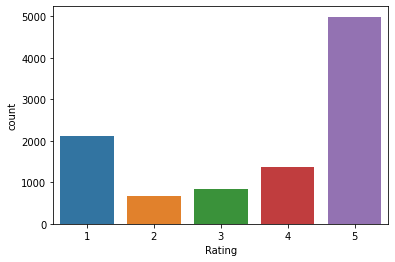

In [79]:
import seaborn as sns
sns.countplot(df["Rating"]);

In [80]:
# Convert the ratings to either positive or negative based on their values. Anything less than 3 is negative and including and above it is positive.

def categorize(rating):
    if rating < 3:
        return 'negative'
    return 'positive'

rating_classification = df['Rating'].map(categorize) 
df['Rating'] = rating_classification

In [81]:
df.head() # Check the change.

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,Great phone to replace my lost phone. The only...,0.0


positive    7206
negative    2794
Name: Rating, dtype: int64

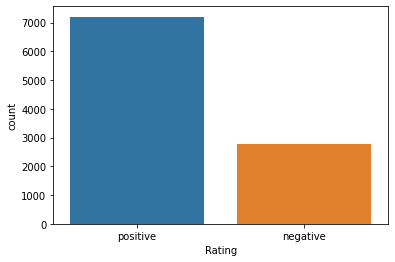

In [82]:
import seaborn as sns
sns.countplot(df["Rating"]) # See how positives and negatives are distributed.
df["Rating"].value_counts()

## Cleaning Data

In [83]:
# Find sentences that contains the HTML tags so that they can be cleaned.
import re
i=0;
for sent in df['Reviews'].values:
    if (len(re.findall('<.*?>', sent))):
        print(i)
        print(sent)
        break;
    i += 1;

4646
Unless you know how to jail break this phone... what's the point? Most apps don't support this old phone. <(it's not really old, they just want you to spend money on the newer version. wtf? but whatever)>


In [88]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("english")) 
from textblob import TextBlob
from textblob import Word

df['Reviews'] = df['Reviews'].astype(str) # Convert the Reviews column to string type to continue with the cleaning.

# Convert all the words to lower. Example: "Upper" and "upper" are different because they have different ascii keys.
df['Reviews'] = df['Reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Remove the punctuations and special characters
df['Reviews'] = df['Reviews'].str.replace("@,#,$,!,^,&,*,_,+,=,~,`,,,.,:,;,/,?",'') # remove puncuation special characters and numbers

# remove all the stopwords from english language
df['Reviews'] = df['Reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

# Tokenize and Lemmatize the texts.
df['Reviews'] = df['Reviews'].apply(lambda x: TextBlob(x).words)
df['Reviews'] = df['Reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x]))
df['Reviews']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0       feel lucky found used phone u used hard all ph...
1       nice phone nice grade pantach revue clean set ...
2                                                 pleased
3             work good go slow sometimes good phone love
4       great phone replace lost phone thing volume bu...
                              ...                        
9995    word ca n't describe unsatisfied am product or...
9996    first iphone receive great condition rival bra...
9997    black color white took white color sent free c...
9998    phone unlocked received it tried several carri...
9999    nice phone like it.it like brand apps availabi...
Name: Reviews, Length: 10000, dtype: object

# 1. KMeans CLustering using Bag of words technique.

In [91]:
from sklearn.feature_extraction.text import CountVectorizer # Used to transform so that model can understand the data.
count_vector = CountVectorizer()
bag_of_words = count_vector.fit_transform(df['Reviews'].values)

# Import KMeans from sciKit Learn
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters = 15,init='k-means++', n_jobs = -1,random_state=22)
kmeans_model.fit(bag_of_words)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=15, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=22, tol=0.0001, verbose=0)

In [92]:
labels = kmeans_model.labels_
cluster_center = kmeans_model.cluster_centers_

In [94]:
cluster_center # centroids of all the clusters

array([[2.48190279e-03, 0.00000000e+00, 0.00000000e+00, ...,
        6.20475698e-04, 0.00000000e+00, 0.00000000e+00],
       [6.25000000e-02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.49253731e-02],
       ...,
       [7.50000000e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [96]:
# See how far the clusters are
silhouette_score = metrics.silhouette_score(bag_of_words, labels, metric='euclidean')
silhouette_score

0.04093664177156898

In [99]:
# Giving Labels to each cluster
df_kmeans = df 
df_kmeans['Cluster Label'] = kmeans_model.labels_ # adds the last column with the labels
df_kmeans

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Cluster Label
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,feel lucky found used phone u used hard all ph...,1.0,4
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,nice phone nice grade pantach revue clean set ...,0.0,4
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,pleased,0.0,0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,work good go slow sometimes good phone love,0.0,6
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,great phone replace lost phone thing volume bu...,0.0,4
...,...,...,...,...,...,...,...
9995,"Apple iPhone 4 8GB, Unlocked (Black)",NaN,122.00,1,word ca n't describe unsatisfied am product or...,2.0,6
9996,"Apple iPhone 4 8GB, Unlocked (Black)",NaN,122.00,2,first iphone receive great condition rival bra...,2.0,6
9997,"Apple iPhone 4 8GB, Unlocked (Black)",NaN,122.00,4,black color white took white color sent free c...,0.0,6
9998,"Apple iPhone 4 8GB, Unlocked (Black)",NaN,122.00,1,phone unlocked received it tried several carri...,0.0,6


In [102]:
# Check the number of clusters
df_kmeans.groupby(["Cluster Label"])['Reviews'].count()

Cluster Label
0     4835
1       16
2       67
3        2
4     1046
5        1
6     3662
7        2
8       79
9      282
10       1
11       1
12       4
13       1
14       1
Name: Reviews, dtype: int64

###**We see there are seven main clusters.**

In [113]:
# Find the top 10 features of cluster centroid that a re meaningful.
print("Top terms per main clusters:")
order_centroids = kmeans_model.cluster_centers_.argsort()[:, ::-1]
terms = count_vector.get_feature_names()

for i in [0,1,2,4,6,8,9]:
    print("Cluster %d:" % i, end='')
    print(" ") # Enter new line
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
        print()

Top terms per main clusters:
Cluster 0: 
 good
 work
 great
 iphone
 it
 product
 new
 like
 love
 condition
Cluster 1: 
 phone
 screen
 camera
 one
 like
 would
 it
 use
 get
 battery
Cluster 2: 
 phone
 battery
 use
 like
 good
 one
 get
 screen
 card
 really
Cluster 4: 
 phone
 work
 screen
 one
 good
 great
 new
 it
 would
 get
Cluster 6: 
 phone
 great
 work
 good
 new
 it
 iphone
 like
 one
 love
Cluster 8: 
 phone
 screen
 good
 camera
 great
 it
 like
 one
 use
 get
Cluster 9: 
 phone
 one
 screen
 would
 it
 great
 time
 iphone
 get
 new


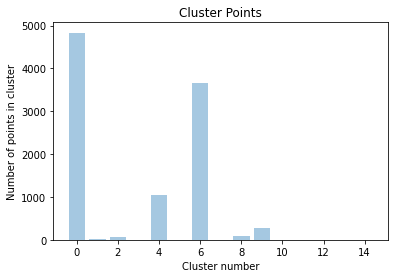

In [120]:
# Visualization

import matplotlib.pyplot as plots
plots.bar([x for x in range(15)],df_kmeans.groupby(["Cluster Label"])['Reviews'].count(), alpha = 0.4)
plots.title('Cluster Points')
plots.xlabel("Cluster number")
plots.ylabel("Number of points in cluster")
plots.show()

# 2. DBSCAN

In [121]:
# Import DBSCAN from scikit learn
from sklearn.cluster import DBSCAN

In [146]:
# First use Average word to vector model to pass to DBSCAN model
# Train your own Word2Vec model
list_of_sent=[]
for sent in df['Reviews'].values:
    list_of_sent.append(sent.split())

In [134]:
# removing html tags and apostrophes if present using the code in the link from the question.
import re
def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanreg = re.compile('<.*?>')
    cleantext = re.sub(cleanreg, ' ', sentence)
    return cleantext

def cleanpunctuation(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

In [135]:
i=0
list_of_sent_train=[]
for sent in df['Reviews'].values:
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunctuation(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    list_of_sent_train.append(filtered_sentence)

In [149]:
import gensim
# Training the wor2vec model using train dataset
w2v_model=gensim.models.Word2Vec(list_of_sent_train,size=100, workers=4)

In [150]:
import numpy as np
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this train
for sent in list_of_sent_train: # for each review/sentence
    sent_vec = np.zeros(100) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors)
sent_vectors.shape

(10000, 100)

In [161]:
# Computing 200th Nearest neighbour distance

minPts = 200

 # return the number greater than or equal to itself.
def lower_bound(nums, target):
    l, r = 0, len(nums) - 1
    while l <= r: # Binary searching.
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

# Returns the distance of 200th nearest neighbour.
def compute_200_nearest_neighbour(x, data): 
    distances = []
    for val in data:
        distance = np.sum((x - val) **2 ) # distances
        if(len(distances) == 200 and distances[199] > distance): # If distance is larger than current largest distance found 
            l = int(lower_bound(distances, distance)) 
            if l < 200 and l >= 0 and distances[l] > distance:
                distances[l] = distance
        else:
            distances.append(distance)
            distances.sort()
    
    return distances[199] # Dist 199 contains the distance of 200th nearest neighbour.

In [153]:
# Create sent vectors - this needs to be passed on DBSCAN model.

sent_vectors = []; # the avg-w2v for each sentence/review is stored in this train

for sent in list_of_sent_train: # for each review/sentence
    sent_vec = np.zeros(100) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)

sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors)

In [154]:
two_hundreth_neighbor = []
for val in sent_vectors[:1500]:
    two_hundreth_neighbor.append( compute_200_nearest_neighbour(val, sent_vectors[:1500]) )
two_hundreth_neighbor.sort()

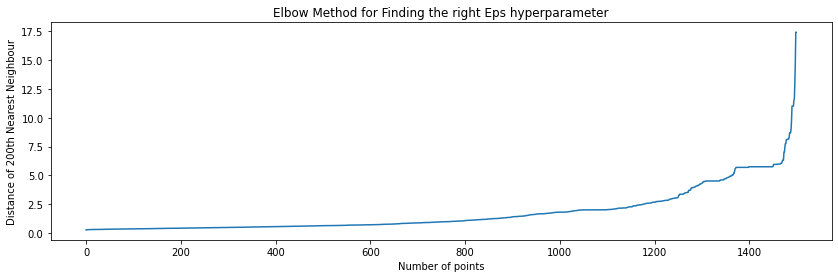

In [155]:
# Plotting for the Elbow Method :
plots.figure(figsize=(14,4))
plots.title("Elbow Method")
plots.plot([x for x in range(len(twohundrethneigh))], twohundrethneigh)
plots.xlabel("Number of points")
plots.ylabel("Distance of 200th Nearest Neighbour")
plots.show()

In [156]:
# Create the model
model_dbs = DBSCAN(eps = 5, min_samples = minPts, n_jobs=-1)
model_dbs.fit(sent_vectors)

DBSCAN(algorithm='auto', eps=5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=200, n_jobs=-1, p=None)

In [159]:
df_dbs = df
df_dbs["DBS Cluster Label"] = model_dbs.labels_
df_dbs

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Cluster Label,DBS Cluster Label
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,feel lucky found used phone u used hard all ph...,1.0,4,0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,nice phone nice grade pantach revue clean set ...,0.0,4,0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,pleased,0.0,0,0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,work good go slow sometimes good phone love,0.0,6,0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,great phone replace lost phone thing volume bu...,0.0,4,0
...,...,...,...,...,...,...,...,...
9995,"Apple iPhone 4 8GB, Unlocked (Black)",NaN,122.00,1,word ca n't describe unsatisfied am product or...,2.0,6,0
9996,"Apple iPhone 4 8GB, Unlocked (Black)",NaN,122.00,2,first iphone receive great condition rival bra...,2.0,6,0
9997,"Apple iPhone 4 8GB, Unlocked (Black)",NaN,122.00,4,black color white took white color sent free c...,0.0,6,0
9998,"Apple iPhone 4 8GB, Unlocked (Black)",NaN,122.00,1,phone unlocked received it tried several carri...,0.0,6,0


In [160]:
df_dbs.groupby(["DBS Cluster Label"])["Reviews"].count()

DBS Cluster Label
0    10000
Name: Reviews, dtype: int64

**Only one cluster was identified based on this DBSCAN method**

# Clustering Hierarchial

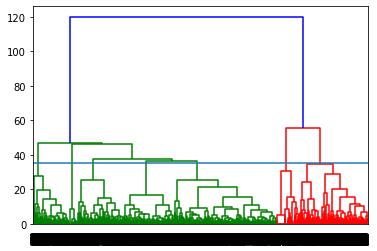

In [169]:
# Import necessary libraries
import scipy
from scipy.cluster import hierarchy

# Dendogram plot
dendro=hierarchy.dendrogram(hierarchy.linkage(sent_vectors,method='ward'))
plt.axhline(y=35)# cut at 30 to get 5 clusters

In [174]:
from sklearn.cluster import AgglomerativeClustering

# 
hierarchial_cluster = AgglomerativeClustering(n_clusters=20, affinity='euclidean', linkage='ward')  #took n=5 from dendrogram curve 
Agg = hierarchial_cluster.fit_predict(sent_vectors)

In [175]:
hier_df = df # Give the labels and group to count the number of data in each clusters.
hier_df["Hierarchial Cluster Labels"] = hierarchial_cluster.labels_
hier_df.groupby(["Hierarchial Cluster Labels"])["Reviews"].count()

Hierarchial Cluster Labels
0      438
1     1019
2      988
3      398
4      804
5      287
6      222
7      215
8      830
9      989
10      31
11     333
12     130
13    1015
14     778
15     142
16     686
17     247
18     150
19     298
Name: Reviews, dtype: int64

#### In one paragraph, please compare K means, DBSCAN and Hierarchical clustering.

### K means clustering 
a. Fastest of three methods
b. Can handle large amount of data
c. Outliers and noise cannot be identified using this method
d. required to specify number of clusters at beginning.
e. can create cluster will different sizes.

###DBSCAN
a. Slower compared to KMeans method
b. Not good handling large amount of data
c. cannot handle outliers
d. not required to specify number of clusters at the beginning.However, in this assignment, the method created only one cluster so not helpful.
e. can create different size clusters

### Hierarchial Clustering
a. Slower compared to Kmeans method
b. Can be slower for large amount of data and expensive to scale.
c. It can handle outliers
d. need to specify the number of clusters at the beginning.
e. usually creates same size clusters.



